In [1]:
### YOUR CODE HERE ###
import sqlalchemy
import psycopg2
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

conn = ***
engine = sqlalchemy.create_engine(conn)
connect = engine.connect()

In [2]:
# загрузим доступные таблицы и посомтрим на них
hr = pd.read_sql("""SELECT * FROM hr_dataset""",
                        connect)
hr.head()

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [3]:
prod = pd.read_sql("""SELECT * FROM production_staff""", 
                               connect)
prod.head()

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0


In [4]:
rc = pd.read_sql("""SELECT * FROM recruiting_costs""", 
                              connect)
rc.head()

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
sg = pd.read_sql("""SELECT * FROM salary_grid""", connect)
sg

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45
5,6,Network Engineer,50845,66850,88279,24.44,32.14,42.44
6,7,Sr. Network Engineer,79428,99458,120451,38.19,47.82,57.91
7,8,Database Administrator,50569,68306,93312,24.31,32.84,44.86
8,9,Sr. DBA,92863,116007,139170,44.65,55.77,66.91
9,10,Production Technician I,30000,40000,50000,14.42,19.23,24.04


In [6]:
# для больше информативности исследуем атрибуты каждой из таблиц
hr_desc_col = pd.read_sql("""select column_name, data_type
 from INFORMATION_SCHEMA.COLUMNS where table_name ='hr_dataset'""", connect)
prod_desc_col = pd.read_sql(""" select column_name, data_type
 from INFORMATION_SCHEMA.COLUMNS where table_name ='production_staff'""", connect)
rc_desc_col = pd.read_sql(""" select column_name, data_type
 from INFORMATION_SCHEMA.COLUMNS where table_name ='recruiting_costs'""", connect)
sg_desc_col = pd.read_sql(""" select column_name, data_type
 from INFORMATION_SCHEMA.COLUMNS where table_name ='salary_grid'""", connect)
print(hr_desc_col, prod_desc_col, rc_desc_col, sg_desc_col, sep = '\n\n\n')

            column_name          data_type
0                    id            integer
1         Employee Name  character varying
2       Employee Number            integer
3             marriedid            integer
4       maritalstatusid            integer
5              genderid            integer
6          empstatus_id            integer
7                deptid            integer
8          perf_scoreid            integer
9                   age            integer
10             Pay Rate               real
11                state          character
12                  zip            integer
13                  dob               date
14                  sex  character varying
15          maritaldesc  character varying
16          citizendesc  character varying
17      Hispanic/Latino  character varying
18             racedesc  character varying
19         Date of Hire               date
20        Days Employed            integer
21  Date of Termination               date
22      Rea

In [7]:
# посмотрим количество строк в каждой таблице 
hr_count = pd.read_sql("""SELECT COUNT(*) FROM hr_dataset""",
                      connect)
prod_count = pd.read_sql("""SELECT COUNT(*) FROM production_staff""",
                      connect)
rc_count = pd.read_sql("""SELECT COUNT(*) FROM recruiting_costs""",
                      connect)
sg_count = pd.read_sql("""SELECT COUNT(*) FROM salary_grid""",
                      connect)
print(hr_count, prod_count, rc_count, sg_count, sep='\n\n\n')

   count
0    310


   count
0    256


   count
0     22


   count
0     12


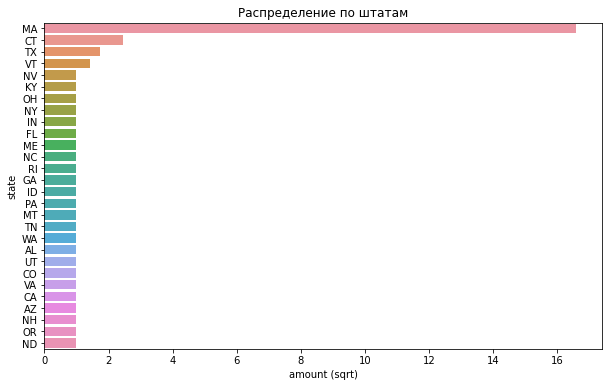

,state,amount
0,MA,16.583124
1,CT,2.449490
2,TX,1.732051
3,VT,1.414214
4,NV,1.000000
5,KY,1.000000
6,OH,1.000000
7,NY,1.000000
8,IN,1.000000
9,FL,1.000000


In [8]:
# посмотрим, с каких штатов наши работники родом
# загружаем данные из БД
bornplace = pd.read_sql("""SELECT "state",  sqrt(COUNT(*)) as "amount" 
FROM hr_dataset GROUP BY "state" ORDER BY "amount" DESC""", 
                       connect)
# строим горизонтальный barplot для наглядности
plt.figure(figsize=(10, 6))
sns.barplot(data=bornplace, orient='h', x='amount', y='state')
plt.title("Распределение по штатам")
plt.xlabel("amount (sqrt)")
plt.show()
bornplace

Отмечаем, что работники преимущественно из штата МА, но есть и работники из других штатов

In [9]:
# анализируем, какой performance score по штатам чаще всего без учета полного соответствия
# и откуда больше одного работника
# загружаем данные
state_ps = pd.read_sql("""WITH
t1 as (SELECT "state", mode() within group (ORDER BY "Performance Score") FROM hr_dataset 
GROUP BY "state"),
t2 as (SELECT "state" 
FROM hr_dataset GROUP BY "state" HAVING COUNT(*) > 1)

SELECT * FROM t1 WHERE "mode" != 'Fully Meets' AND "state" in (SELECT * FROM t2)
""", connect)
state_ps

,state,mode
0,TX,Exceptional


Отмечаем, что выявить какие-то различия между штатами по performance score не удается

In [10]:
# исследуем возрастную составляющую наших работников
# загружаем данные
age = pd.read_sql("""SELECT MIN("age"), MAX("age"), AVG("age"), 
PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "age") as "median" FROM hr_dataset
""", connect)
age

,min,max,avg,median
0,25,67,38.867742,37.0


Компания имеет достаточно зрелых работников. Нет студентов или молодежи.

In [11]:
# посмотрим на доверительный интервал возраста с вероятностью 95%
intervals=pd.read_sql("""WITH 
t1 as (SELECT AVG("age") as "average", stddev("age") as "std", sqrt(COUNT(*)) as "sqrtn" FROM hr_dataset)

SELECT round(CAST("average"+1.96*"std"/"sqrtn" as numeric), 2) as inter_up, 
round(CAST("average"-1.96*"std"/"sqrtn" as numeric), 2) as inter_dwn FROM t1
""", connect)
intervals

,inter_up,inter_dwn
0,39.86,37.87


Данные доверительный интервал показывает, что работники действительно зрелые.

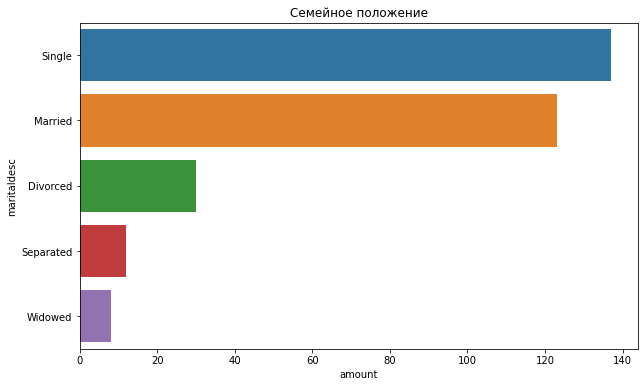

,maritaldesc,amount,%
0,Single,137,44.19
1,Married,123,39.68
2,Divorced,30,9.68
3,Separated,12,3.87
4,Widowed,8,2.58


In [12]:
# исследуем семейный статус работников
# загружаем данные
maritalst=pd.read_sql("""WITH
t1 as (SELECT "maritaldesc", COUNT(*) as "amount" 
	   FROM hr_dataset GROUP BY "maritaldesc" ORDER BY "amount" DESC)
	   
SELECT "maritaldesc", "amount", ROUND("amount"/SUM("amount") OVER() * 100, 2) as "%" FROM t1
""", connect)
# строим barplot для визуализации
plt.figure(figsize=(10, 6))
sns.barplot(data=maritalst, orient='h', x='amount', y='maritaldesc')
plt.title("Семейное положение")
plt.show()
maritalst

Больше половины людей (около 61%) одиноки. 

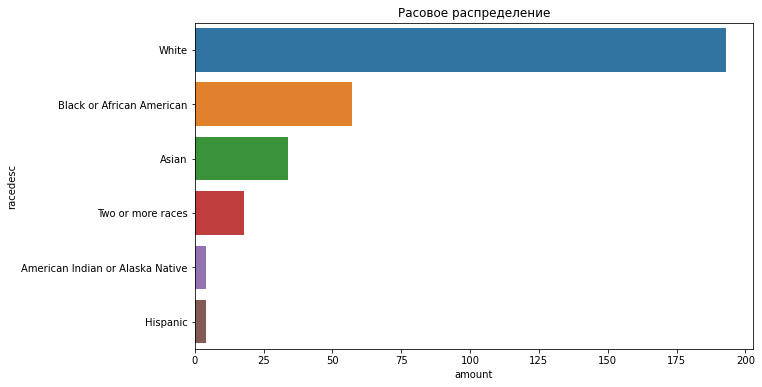

,racedesc,amount,%
0,White,193,62.26
1,Black or African American,57,18.39
2,Asian,34,10.97
3,Two or more races,18,5.81
4,American Indian or Alaska Native,4,1.29
5,Hispanic,4,1.29


In [13]:
# посмотрим расовое распределение
# загрузка данных
race = pd.read_sql("""WITH 
t1 as (SELECT "racedesc", COUNT(*) as "amount" 
FROM hr_dataset GROUP BY "racedesc" ORDER BY "amount" DESC)

SELECT "racedesc", "amount", ROUND("amount"/SUM("amount") OVER() * 100, 2) as "%" FROM t1
""", connect)
# визуализируем данные
plt.figure(figsize=(10, 6))
sns.barplot(data=race, orient='h', x='amount', y='racedesc')
plt.title("Pасовое распределение")
plt.show()
race

,department,amount,%
0,Production,208,67.10
1,IT/IS,50,16.13
2,Sales,31,10.00
3,Admin Offices,10,3.23
4,Software Engineering,10,3.23
5,Executive Office,1,0.32


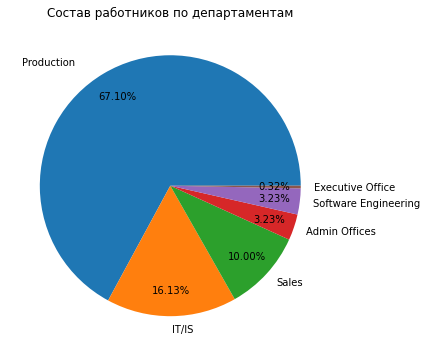

In [14]:
# проанализируем работников по департаментам
# загружаем данные
dep = pd.read_sql("""WITH
t1 as (SELECT "department", COUNT(*) as "amount" FROM hr_dataset GROUP BY "department" ORDER BY "amount" DESC)

SELECT "department", "amount", ROUND("amount"/SUM("amount") OVER() * 100, 2) as "%" FROM t1
""", connect)
# визуализируем данные
plt.figure(figsize=(10, 6))
plt.pie(data=dep ,x='amount',autopct="%.2f%%", labels='department', pctdistance=0.8)
plt.title('Состав работников по департаментам')
dep

Основной отдел - это Production, остальные носят вспомогательный или административный характер

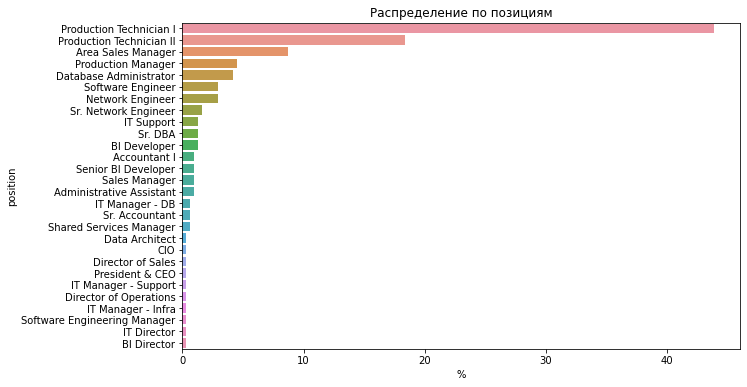

,position,amount,%
0,Production Technician I,136,43.87
1,Production Technician II,57,18.39
2,Area Sales Manager,27,8.71
3,Production Manager,14,4.52
4,Database Administrator,13,4.19
5,Software Engineer,9,2.90
6,Network Engineer,9,2.90
7,Sr. Network Engineer,5,1.61
8,IT Support,4,1.29
9,Sr. DBA,4,1.29


In [15]:
# проанализируем количество работников по позициям
# загрузка данных
position = pd.read_sql("""WITH 
t1 as (SELECT "position", COUNT(*) as "amount" FROM hr_dataset GROUP BY "position" ORDER BY "amount" DESC)

SELECT "position", "amount", ROUND("amount"/SUM("amount") OVER () * 100, 2) as "%" FROM t1
""", connect)
# визуализация
plt.figure(figsize=(10, 6))
sns.barplot(data=position, y='position', x='%', orient='h')
plt.title("Распределение по позициям")
plt.show()
position

Более 60% - это Production Technician

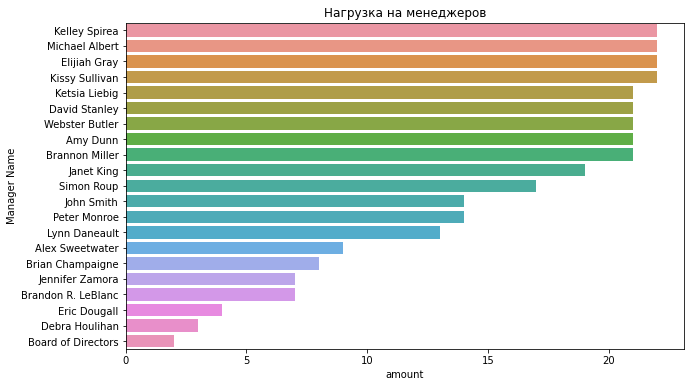

,Manager Name,amount,%
0,Kelley Spirea,22,7.10
1,Michael Albert,22,7.10
2,Elijiah Gray,22,7.10
3,Kissy Sullivan,22,7.10
4,Ketsia Liebig,21,6.77
5,David Stanley,21,6.77
6,Webster Butler,21,6.77
7,Amy Dunn,21,6.77
8,Brannon Miller,21,6.77
9,Janet King,19,6.13


In [16]:
# проанализируем нагрузку на менеджеров
# загрузка данных
m_load = pd.read_sql("""WITH
t1 as (SELECT "Manager Name", COUNT(*) as "amount" FROM hr_dataset GROUP BY "Manager Name" ORDER BY "amount" DESC)

SELECT "Manager Name", "amount", ROUND("amount"/SUM("amount") OVER() * 100, 2) as "%" FROM t1
""", connect)
# визуализация
plt.figure(figsize=(10, 6))
sns.barplot(data=m_load, orient='h', x='amount', y = 'Manager Name')
plt.title("Нагрузка на менеджеров")
plt.show()
m_load

В основном 9 человек курируют более 50% работников

In [17]:
# проанализируем, какие чаще всего оценки встроечаются у менеджеров в отношении работников
# загружаем данные
pers = pd.read_sql("""SELECT "Manager Name", mode() WITHIN GROUP (ORDER BY "Performance Score") 
FROM hr_dataset  GROUP BY "Manager Name"
""", connect)
pers

,Manager Name,mode
0,Alex Sweetwater,Fully Meets
1,Amy Dunn,Fully Meets
2,Board of Directors,Fully Meets
3,Brandon R. LeBlanc,Fully Meets
4,Brannon Miller,Fully Meets
5,Brian Champaigne,Fully Meets
6,David Stanley,Fully Meets
7,Debra Houlihan,Fully Meets
8,Elijiah Gray,Fully Meets
9,Eric Dougall,Fully Meets


Можно сделать вывод, что нет менеджера, который ставит в большинстве отрицательные оценки

In [18]:
# проанализируем отрицательные оценки у менеджеров
# загружаем данные
pers_bad = pd.read_sql("""SELECT "Performance Score", "amount", STRING_AGG("Manager Name", ', ') as "Managers Names" FROM 
(SELECT "Manager Name", "Performance Score", Count(*) as "amount" 
FROM hr_dataset GROUP BY "Manager Name", "Performance Score" 
HAVING "Performance Score" = 'PIP' OR "Performance Score" = 'Needs Improvement'
ORDER BY "amount" DESC) as t1
GROUP BY "Performance Score", "amount"
ORDER BY "amount" DESC
""", connect)
pers_bad

,Performance Score,amount,Managers Names
0,PIP,4,Brannon Miller
1,Needs Improvement,3,Michael Albert
2,Needs Improvement,2,"Janet King, Webster Butler"
3,Needs Improvement,1,"Ketsia Liebig, Alex Sweetwater, Kissy Sullivan..."
4,PIP,1,"Amy Dunn, Kissy Sullivan, Lynn Daneault, John ..."


Проблемные работники находятся у менеджеров Brannon Miller и Michael Albert

In [19]:
# проанализируем оценки работников на основании компаний-рекруторов
# загружаем данные
new_company=pd.read_sql("""SELECT * FROM (SELECT "Employee Source", mode() WITHIN GROUP (ORDER BY "Performance Score") as "score"
FROM hr_dataset  GROUP BY "Employee Source") as t1
WHERE "score" != 'Fully Meets'
""", connect)
new_company

,Employee Source,score
0,Pay Per Click,N/A- too early to review


Здесь можно сделать вывод о том, что Pay per Click используется недавно

In [20]:
# проанализируем, какие позиции отконяются по performance score
# загружаем данные
problem_pos = pd.read_sql("""SELECT * FROM (SELECT "position", mode() WITHIN GROUP (ORDER BY "Performance Score") as "score"
FROM hr_dataset  GROUP BY "position") as t1 WHERE "score" != 'Fully Meets'
""", connect)
problem_pos

,position,score
0,Administrative Assistant,N/A- too early to review
1,CIO,Exceptional
2,Database Administrator,90-day meets
3,Director of Operations,Exceeds
4,IT Director,Exceptional
5,IT Manager - Infra,Needs Improvement
6,IT Manager - Support,Exceeds
7,Sr. Accountant,90-day meets


Проблемной можно назвать позицию IT Manager-Infra

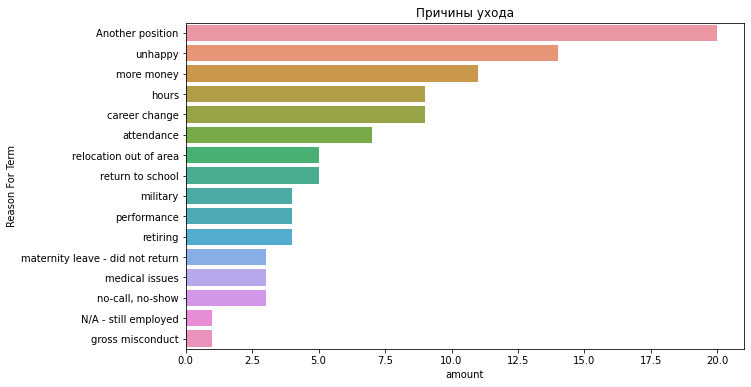

,Reason For Term,amount,%,Pay Rate,position
0,Another position,20,19.42,21.000000,Production Technician I
1,unhappy,14,13.59,22.500000,Production Technician I
2,more money,11,10.68,22.000000,Production Technician I
3,hours,9,8.74,24.000000,Production Technician I
4,career change,9,8.74,26.000000,Production Technician II
5,attendance,7,6.80,24.000000,Production Technician I
6,relocation out of area,5,4.85,21.000000,Production Technician I
7,return to school,5,4.85,19.000000,Production Technician I
8,military,4,3.88,18.500000,Production Technician I
9,performance,4,3.88,29.750000,Database Administrator


In [21]:
# проанализируем причины ухода работников
t_reason = pd.read_sql("""WITH
t2 as (SELECT "Reason For Term", COUNT(*) as "amount" FROM (SELECT "Employee Name", "Date of Termination", "Reason For Term" 
FROM hr_dataset WHERE "Date of Termination" IS NOT NULL) as t1 
GROUP BY "Reason For Term" ORDER BY "amount" DESC),
t3 as (SELECT "Reason For Term", PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY "Pay Rate") AS "Pay Rate",
mode() WITHIN GROUP (ORDER BY "position") as "position"
FROM hr_dataset GROUP BY "Reason For Term" ORDER BY "Pay Rate" DESC)

SELECT "Reason For Term", "amount", ROUND("amount"/SUM("amount") OVER() * 100, 2) as "%", "Pay Rate", "position"
from t2 JOIN t3 USING ("Reason For Term")
""", connect)
# визуализируем данные
plt.figure(figsize=(10, 6))
sns.barplot(data=t_reason, x='amount', y='Reason For Term', orient='h')
plt.title("Причины ухода")
plt.show()
t_reason

Отмечаем, что люди уходят преимущественно (около 40%) либо на другую позицию, либо от того, что им не нравится работа, либо им нужно больше денег

In [22]:
# проанализируем, кто набирал Database Administrators
source_da = pd.read_sql('''SELECT DISTINCT "Employee Source" FROM hr_dataset WHERE "position" = 'Database Administrator'
AND ("Reason For Term" = 'performance' OR "Reason For Term" = 'no-call, no-show')
''', connect)
source_da

,Employee Source
0,Employee Referral
1,Glassdoor
2,Search Engine - Google Bing Yahoo


In [23]:
# посмотрим на коррелцию между оплатой труда и проработанными днемя по позициям
# загружаем данные
corr_pay = pd.read_sql("""WITH
t1 as (SELECT DISTINCT "position", corr("Pay Rate", "Days Employed") OVER(ORDER BY "position") as "correlation"
FROM hr_dataset ORDER BY "correlation" DESC)

SELECT * FROM t1 WHERE "correlation" > 0.3""", connect)
corr_pay

,position,correlation
0,Administrative Assistant,0.596190
1,IT Director,0.334033
2,IT Manager - Infra,0.333777
3,IT Manager - Support,0.330900
4,Accountant I,0.329183
5,IT Manager - DB,0.322003
6,Director of Operations,0.315944
7,Director of Sales,0.312551


Умеренно положительная корреляция наблюдается на вышеназванных позициях. Сильно выраженная корреляция прослеживается на позиции Administrative Assistant

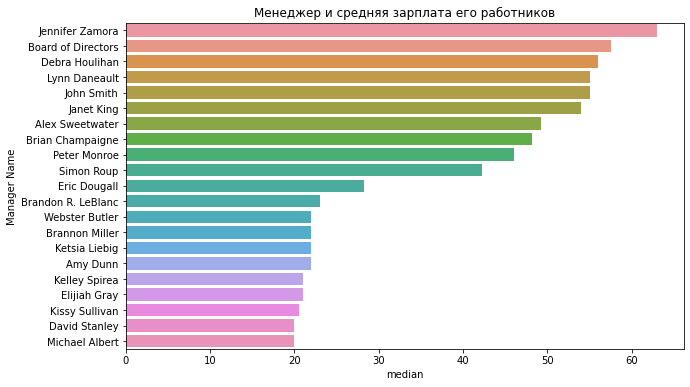

,Manager Name,median
0,Jennifer Zamora,63.000000
1,Board of Directors,57.475000
2,Debra Houlihan,56.000000
3,Lynn Daneault,55.000000
4,John Smith,55.000000
5,Janet King,54.000000
6,Alex Sweetwater,49.250000
7,Brian Champaigne,48.125000
8,Peter Monroe,46.000000
9,Simon Roup,42.200001


In [24]:

corr_man = pd.read_sql("""SELECT "Manager Name", PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "Pay Rate")  as "median"
FROM hr_dataset GROUP BY "Manager Name" ORDER BY "median" DESC
""", connect)
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_man, x='median', y='Manager Name', orient='h')
plt.title("Менеджер и средняя зарплата его работников")
plt.show()
corr_man

Менеджер, ведущий работников с самым высоким уровнем оплаты, Jennifer Zamora

In [25]:
# аналитика зарплаты по расовым признакам
# загрузка данных
corr_race = pd.read_sql("""SELECT "racedesc", PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "Pay Rate")  as "median", 
MAX("Pay Rate") as "max", MIN("Pay Rate") as "min"
FROM hr_dataset GROUP BY "racedesc" ORDER BY "median" DESC
""", connect)
corr_race

,racedesc,median,max,min
0,Hispanic,39.50,63.0,17.0
1,Black or African American,28.50,65.0,14.0
2,American Indian or Alaska Native,24.75,56.0,16.0
3,White,23.50,80.0,14.0
4,Asian,23.00,56.0,14.0
5,Two or more races,22.50,55.5,14.0


In [26]:
# какие рекруторы учавствуют в наборе персонала по позициям
# загрузка данных
recr = pd.read_sql("""WITH
t1 as (SELECT "Employee Source", mode() WITHIN GROUP (ORDER BY "position") as "position"
FROM hr_dataset
GROUP BY "Employee Source")

SELECT "position", STRING_AGG("Employee Source", ', ') as "Employee Source" FROM t1
GROUP BY "position"
""", connect)
recr

,position,Employee Source
0,Production Manager,Internet Search
1,BI Developer,Indeed
2,Production Technician I,"Billboard, Diversity Job Fair, Employee Referr..."
3,Production Technician II,"Careerbuilder, Glassdoor, Vendor Referral"
4,Sr. DBA,Company Intranet - Partner
5,Area Sales Manager,"Other, Pay Per Click - Google, Website Banner Ads"
6,IT Support,Information Session


In [27]:
# аналитика того, как рекруторы справляются со своей задачей
rec_work = pd.read_sql("""SELECT "Employee Source", mode() WITHIN GROUP (ORDER BY "Performance Score") as "score"
FROM hr_dataset
GROUP BY "Employee Source"
""", connect)
rec_work

,Employee Source,score
0,Billboard,Fully Meets
1,Careerbuilder,Fully Meets
2,Company Intranet - Partner,Fully Meets
3,Diversity Job Fair,Fully Meets
4,Employee Referral,Fully Meets
5,Glassdoor,Fully Meets
6,Indeed,Fully Meets
7,Information Session,Fully Meets
8,Internet Search,Fully Meets
9,MBTA ads,Fully Meets


В большинстве рекрутами подбираются работники, которые полностью соответствуют

In [28]:
# посмотрим рекруторов, нашедших работников, которые требуют доработок
# загрузка данных
rec_eff = pd.read_sql("""WITH 
t1 as (SELECT "Employee Source", "position", mode() WITHIN GROUP (ORDER BY "Performance Score") as "score"
FROM hr_dataset
GROUP BY "Employee Source", "position"),
t2 as (SELECT "Employee Source", mode() WITHIN GROUP (ORDER BY "position") as "position", 'main' as "main"
FROM hr_dataset
GROUP BY "Employee Source")

SELECT * FROM t1 LEFT JOIN t2 USING ("Employee Source", "position") 
WHERE "score" = 'Needs Improvement'
""", connect)
rec_eff

,Employee Source,position,score,main
0,Internet Search,Area Sales Manager,Needs Improvement,None
1,Diversity Job Fair,IT Manager - Infra,Needs Improvement,None
2,Diversity Job Fair,Sales Manager,Needs Improvement,None
3,Other,Production Manager,Needs Improvement,None
4,Billboard,Software Engineer,Needs Improvement,None
5,Monster.com,Production Manager,Needs Improvement,None


Замечаем, что из всего списка пристутствует несколько способов набора персонала, которые набирают нерелевантных работников

In [29]:
# посчитаем процентный убыток от нерелевантных работников от общей оплаты услуг
# загрузка данных
loss = pd.read_sql("""WITH 
t1 as (SELECT "Employee Source", "position", mode() WITHIN GROUP (ORDER BY "Performance Score") as "Performance Score"
FROM hr_dataset
GROUP BY "Employee Source", "position"),
t2 as (SELECT "Employee Source", mode() WITHIN GROUP (ORDER BY "position") as "position", 'main' as "main"
FROM hr_dataset
GROUP BY "Employee Source"),
t3 as (SELECT "Employee Source", COUNT("position") as "bad" FROM t1 LEFT JOIN t2 USING ("Employee Source", "position") 
WHERE "Performance Score" = 'Needs Improvement' GROUP BY "Employee Source"),
t4 as (SELECT "Employee Source", COUNT("position") as "total"
FROM hr_dataset GROUP BY "Employee Source"),
t5 as (SELECT "Employee Source", ("bad"::numeric/"total"::numeric) as "loss"
	   FROM t3 JOIN t4 USING ("Employee Source"))

SELECT "Employee Source", "Total", ("Total"*"loss") as "Loss" From t5 
JOIN recruiting_costs rc ON t5."Employee Source" = rc."Employment Source"
""", connect)
loss

,Employee Source,Total,Loss
0,Billboard,6192,387.000000
1,Diversity Job Fair,10021,691.103448
2,Internet Search,0,0.000000
3,Monster.com,5760,240.000000
4,Other,3995,443.888889


In [30]:
# подсчитаем количество нерелевантных работников по каждому способу рекрутинга
# загрузка данных
wor_loss = pd.read_sql("""WITH 
t1 as (SELECT "Employee Source", "position", mode() WITHIN GROUP (ORDER BY "Performance Score") as "Performance Score"
FROM hr_dataset
GROUP BY "Employee Source", "position"),
t2 as (SELECT "Employee Source", mode() WITHIN GROUP (ORDER BY "position") as "position", 'main' as "main"
FROM hr_dataset
GROUP BY "Employee Source"),
t3 as (SELECT "Employee Source", COUNT("position") as "bad" FROM t1 LEFT JOIN t2 USING ("Employee Source", "position") 
WHERE "Performance Score" = 'Needs Improvement' GROUP BY "Employee Source"),
t4 as (SELECT "Employee Source", COUNT("position") as "total"
FROM hr_dataset GROUP BY "Employee Source"),
t5 as (SELECT "Employee Source", "bad", "total", ("bad"::numeric/"total"::numeric) * 100 as "loss"
	   FROM t3 JOIN t4 USING ("Employee Source") ORDER BY "loss" DESC)
SELECT * FROM t5""", connect)
wor_loss

,Employee Source,bad,total,loss
0,Internet Search,1,6,16.666667
1,Other,1,9,11.111111
2,Diversity Job Fair,2,29,6.896552
3,Billboard,1,16,6.250000
4,Monster.com,1,24,4.166667


Стоит обратить внимание на рекрут-компанию Diversity Job Fair и другие источники, она лидирует по подбору нерелевантных работников и приносит наибольший убыток. Остальные способы вполне допустимы по потерям

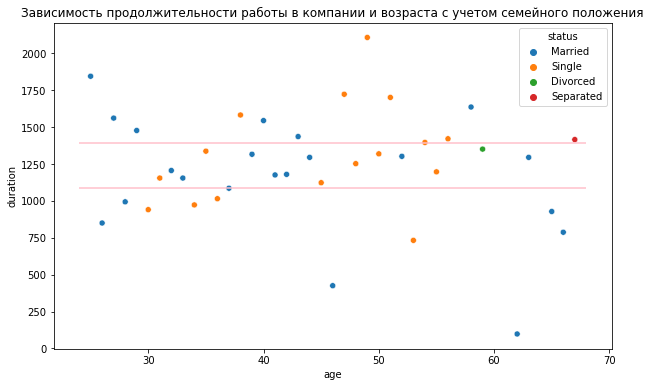

,age,median,mode
0,from 25 to 30,1234.5,Married
1,from 30 to 45,1179.0,Married
2,from 45 to 60,1350.0,Single
3,under 60,927.5,Married


In [31]:
# анализируем зависимость продолжительности работы и возраста с учетом семейного положения
# загружаем данные
duration = pd.read_sql('''SELECT "age", PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "Days Employed") as "duration", 
mode() WITHIN GROUP(ORDER BY "maritaldesc") as "status"
FROM hr_dataset GROUP BY "age" ORDER BY "age"''', connect)

duration1 = pd.read_sql('''WITH
t1 as (SELECT "age", PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "Days Employed") as "duration", 
mode() WITHIN GROUP(ORDER BY "maritaldesc") as "status"
FROM hr_dataset GROUP BY "age" ORDER BY "age"),
t2 as (SELECT CASE WHEN "age" <= 30 THEN 'from 25 to 30'
WHEN 30<"age" AND "age"<=45 THEN 'from 30 to 45'
WHEN 45<"age" AND "age"<=60 THEN 'from 45 to 60'
WHEN 60<"age" THEN 'under 60' END AS "age", "duration", "status" FROM t1)

SELECT "age", PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "duration") as "median", 
mode() WITHIN GROUP (ORDER BY "status") FROM t2
GROUP BY "age" ORDER BY "age"''', connect)

intervals = pd.read_sql('''WITH
t1 as (SELECT "age", PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "Days Employed") as "duration", 
mode() WITHIN GROUP(ORDER BY "maritaldesc") as "status"
FROM hr_dataset GROUP BY "age" ORDER BY "age"),
t2 as (SELECT AVG("duration") as "average", stddev("duration") as "std", sqrt(COUNT(*)) as "sqrtn" FROM t1)

SELECT round(CAST("average"+2.57*"std"/"sqrtn" as numeric), 2) as inter_up, 
round(CAST("average"-2.57*"std"/"sqrtn" as numeric), 2) as inter_dwn FROM t2
''', connect)
# визуализируем данные
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=duration, x = 'age', y = 'duration', hue='status')
ax.hlines(y=intervals.inter_up, xmin=duration.age.min()-1, xmax=duration.age.max()+1, color='pink')
ax.hlines(y=intervals.inter_dwn, xmin=duration.age.min()-1, xmax=duration.age.max()+1, color='pink')
plt.title("Зависимость продолжительности работы в компании и возраста с учетом семейного положения")
plt.show()
duration1

В общей сложности идет нормальное распределение по возрасту относительно продолжительности. В основном данные входят в пределы доверительного интервала. Компания достаточно стабильна по возрастному признаку

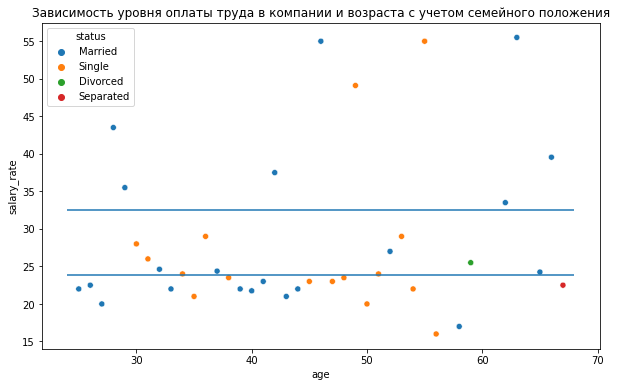

,age,salary_rate,status
0,from 25 to 30,25.25,Married
1,from 30 to 45,23.00,Married
2,from 45 to 60,24.00,Single
3,under 60,33.50,Married


In [32]:
# анализируем уровень оплаты и возраст с учетом семейного положения
# загружаем данные

salary = pd.read_sql('''SELECT "age", PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "Pay Rate") as "salary_rate", 
mode() WITHIN GROUP(ORDER BY "maritaldesc") as "status"
FROM hr_dataset GROUP BY "age" ORDER BY "age"
''', connect)

salary1 = pd.read_sql('''WITH
t1 as (SELECT "age", PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "Pay Rate") as "salary_rate", 
mode() WITHIN GROUP(ORDER BY "maritaldesc") as "status"
FROM hr_dataset GROUP BY "age" ORDER BY "age"),
t2 as (SELECT CASE WHEN "age" <= 30 THEN 'from 25 to 30'
WHEN 30<"age" AND "age"<=45 THEN 'from 30 to 45'
WHEN 45<"age" AND "age"<=60 THEN 'from 45 to 60'
WHEN 60<"age" THEN 'under 60' END AS "age", "salary_rate", "status" FROM t1)

SELECT "age", PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "salary_rate") as "salary_rate", 
mode() WITHIN GROUP (ORDER BY "status") as "status" FROM t2
GROUP BY "age" ORDER BY "age"''', connect)
intervals2 = pd.read_sql('''WITH
t1 as (SELECT "age", PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "Pay Rate") as "salary_rate", 
mode() WITHIN GROUP(ORDER BY "maritaldesc") as "status"
FROM hr_dataset GROUP BY "age" ORDER BY "age"),
t2 as (SELECT AVG("salary_rate") as "average", stddev("salary_rate") as "std", sqrt(COUNT(*)) as "sqrtn" FROM t1)

SELECT round(CAST("average"+2.57*"std"/"sqrtn" as numeric), 2) as inter_up, 
round(CAST("average"-2.57*"std"/"sqrtn" as numeric), 2) as inter_dwn FROM t2
''', connect)
# визуализируем данные
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=salary, x = 'age', y = 'salary_rate', hue='status')
plt.title("Зависимость уровня оплаты труда в компании и возраста с учетом семейного положения")
ax.hlines(y=intervals2.inter_up, xmin=salary.age.min()-1, xmax=salary.age.max()+1)
ax.hlines(y=intervals2.inter_dwn, xmin=salary.age.min()-1, xmax=salary.age.max()+1)
plt.show()
salary1

Мало людей получают среднюю зарплату. Уровень оплаты чаще ниже средней, и небольшое количество людей имеют высокий уровень оплаты.

In [33]:
# посмотрим на разность hr_dataset и production_staff, так как они не совпадают
# загружаем данные
ps_analysis = pd.read_sql('''WITH
t1 as (SELECT ps."Employee Name", coalesce("department", 'NaN') as "department" 
	   FROM hr_dataset hr 
	   RIGHT JOIN production_staff ps USING ("Employee Name")
	  WHERE "department" != 'Production       ' OR
	  ("department" is null AND ps."Employee Name" is not null)),
t2 as (SELECT coalesce("department", 'NaN') as "department" , COUNT(*) FROM hr_dataset hr 
	   RIGHT JOIN production_staff ps 
	   USING ("Employee Name") 
	   WHERE ps."Employee Name" is not null GROUP BY "department")

SELECT "department", "count", coalesce("Employee Name", 'All') FROM t2 LEFT JOIN t1 USING ("department")
''', connect)
ps_analysis

,department,count,coalesce
0,Executive Office,1,"King, Janet"
1,Software Engineering,1,"Sweetwater, Alex"
2,NaN,1,"Monkfish, Erasumus"
3,Production,206,All


Стоит отметить, что в таблице production_staff есть лица, которые не фигурирют в hr_dataset. Их имена и в каком отделе они числятся в hr_dataset представлены выше

In [34]:
# рассчитаем корреляцию между зарплатой и Daily Error Rate
# загружаем данные
err_pay = pd.read_sql('''SELECT corr("Pay"::numeric, coalesce("Daily Error Rate", 0)) FROM production_staff
''', connect)
err_pay

,corr
0,-0.215414


In [35]:
# посмотрим на среднестатистические данные, по которым делалась корреляция
err_pay_v = pd.read_sql('''SELECT coalesce("Daily Error Rate", 0) as "error_amount", 
mode() WITHIN GROUP (ORDER BY "Pay") as "Pay"
FROM production_staff GROUP BY coalesce("Daily Error Rate", 0)
''', connect)
err_pay_v

,error_amount,Pay
0,0,$22.00
1,1,$22.00
2,2,$19.00
3,3,$17.00
4,4,$15.00


Корреляция между оплатой и Daily Error Rate имеет отрицательно слабую корреляцию, что говорит о наличии взаимосвязи

In [36]:
# проведем аналитику зависимости семейного положения и зарплаты
marit_sal = pd.read_sql('''SELECT "maritaldesc", mode() WITHIN GROUP (ORDER BY "Pay") as "salary"
FROM production_staff JOIN hr_dataset USING ("Employee Name")
GROUP BY "maritaldesc" ORDER BY "salary" DESC
''', connect)
marit_sal

,maritaldesc,salary
0,Separated,$29.00
1,Single,$22.00
2,Married,$21.00
3,Divorced,$16.00
4,Widowed,$15.00


Замужние имеют средний заработок и зарабатывают меньше одиноких. Однако разведенные зарабатывают меньше замужних.

In [37]:
# проанализируем семейное положение и среднее количество часов их работы
marit_h = pd.read_sql('''WITH
t1 AS (SELECT "Employee Name", 
	   ("Abutments/Hour Wk 1" + "Abutments/Hour Wk 2") as "total_h"
	  FROM production_staff)

SELECT "maritaldesc", PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "total_h") AS "total_h"
FROM t1 JOIN hr_dataset USING ("Employee Name")
GROUP BY "maritaldesc" ORDER BY "total_h" DESC
''', connect)
marit_h

,maritaldesc,total_h
0,Separated,24.0
1,Divorced,22.5
2,Widowed,21.0
3,Single,20.5
4,Married,19.0


Замужние работают меньше всего, однако одинокие работают не намного больше. Самыми работящими являются люди, пережившие разрыв

In [38]:
# проанализируем пол и среднюю зарплату
sex = pd.read_sql('''SELECT "sex", PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY "Pay Rate") as "Pay Rate"
FROM hr_dataset GROUP BY "sex"
''', connect)
sex

,sex,Pay Rate
0,Female,24.0
1,Male,26.0


# Выводы #

Основное направление компании -  Production, так как основной массив сотрудников работает в данном отделе (67%). Соответственно основной профессией является Production Technician  
Стоит отметить, что территориально все родом преимущественно из штата MA, однако есть сотрудники и из иных штатов, однако данный фактор никак не влияет на performance score (далее - PS).  
Компания достаточно зрелая, так как в основном работают люди зрелого возраста (38-40 лет). Самому молодому работнику 25 лет.  
Более половины людей одиноки (около 61%). Стоит отметить, что одинокие люди в среднем зарабатывают больше, чем замужние. Однако разведенные и овдовевшие зарабатывают меньше замужних. Хотя работают они больше, чем одинокие или замужние.
По гендерному признаку женщины зарабатывают меньше, чем мужчины.
Примечательно, что в целом уровень зарплаты в компании ниже среднего, что следует из преимущественно количества работников, чей уровень оплаты выходит за нижний предел доверительного интервала для уровня оплаты.  
Также это подтверждается причинами, по которым люди покидают компанию. Так, около 40% уходит на другие позиции, от неудовлетворенности и з/п. В частности это Production Technician со средним уровнем заработка. 
Следует обратить внимание на позицию Data Administrator, где достаточно высокий заработок, сотрудники не появляются на работе или не подходят по performance. Следует обратить внимание на рекрут-способы, c помощью которых их набирали, в частности Employee Referral, Glassdoor, Search Engine - Google Bing Yahoo.  
Касательно нагрузки на менеджеров, отмечаем, что 9 из 21 человек курирует более 50% рабоников. В частности, Jennifer Zamora ведет больше всего работников с более крупными зарплатами в среднем.  
В большинстве рекрутами подбираются работники, которые полностью соответствуют. Замечаем, что из всего списка пристутствует несколько способов набора персонала, которые набирают нерелевантных работников, но в отношении профессий, которые являются основными по набору.  
Стоит обратить внимание на рекрут-компанию Diversity Job Fair и другие источники, она лидирует по подбору нерелевантных работников и приносит наибольший убыток (691$). Остальные способы вполне допустимы по потерям.  
Рассмотрим корреляции. Так, рассматривая взаимосвязь времени работы и уровня оплаты, можно заметить, что значительную положительную корреляцию имеет Administrative Assistant (яркую взаимосвязь чем больше работает, тем больше уровень оплаты). Accountant, IT-manager по направлениям имеют по данным показателям слабо положительную корреляцию (не яркую взаимосвязь чем больше работает, тем больше уровень оплаты).  
Проблемной можно назвать позицию IT Manager-Infra, так как по ней больше всего работников с проблемным PS.
Была также выявлена слабо отрицательная корреляция между Daily Error Rate и уровнем оплаты (чем больше совершают ошибок, тем меньше получают). Наличие показателя Daily Error Rate равному 1 уровень зарплаты не уменьшает.